# Sushi / No Sushi


A binary image classifier that can detect the presence of sushi in a picture.

The dataset used for training the model is "The Food-101 Data Set"
https://www.vision.ee.ethz.ch/datasets_extra/food-101/

The model is created using the fastai library where transfer learning was used with a pretrained resnet50 model.
http://fast.ai

The resnet50 model was pretrained with the Imagenet dataset
http://www.image-net.org/


## Data preprocessing

The pictures from was copied in to two folders 'sushi' and 'not_sushi' corresponding to their labels.
The path to the folders are '/data/sortedimages/'

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
#Batch size
bs = 64

import torch
torch.cuda.is_available()

True

In [4]:
path = Path(os.getcwd() + '/data/sortedimages/')

In [5]:
path.ls()

[WindowsPath('C:/FASTAI/projects/ShushiNoSushi/data/sortedimages/models'),
 WindowsPath('C:/FASTAI/projects/ShushiNoSushi/data/sortedimages/not_sushi'),
 WindowsPath('C:/FASTAI/projects/ShushiNoSushi/data/sortedimages/sushi')]

In [6]:
np.random.seed(55)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8, bs=64).normalize(imagenet_stats)

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['not_sushi', 'sushi'], 2, 80000, 20000)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.040333,0.031382,0.008150,14:55
1,0.025454,0.022258,0.006050,14:43
2,0.020276,0.020817,0.005500,14:41


In [10]:
learn.save('first-training')

In [ ]:
learn.load('first-training')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

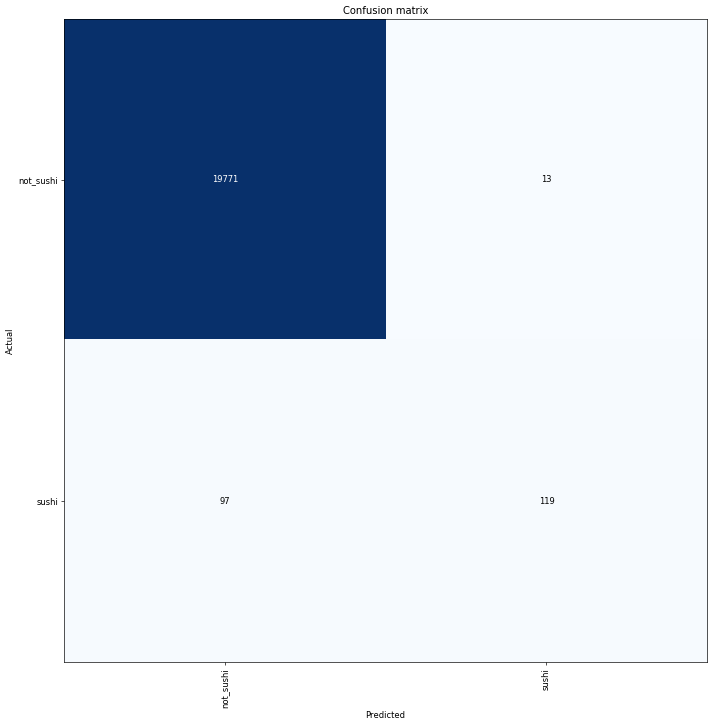

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.confusion_matrix()

array([[19771,    13],
       [   97,   119]], dtype=int64)

While the total error rate is small the classifier will fail to detect sushi in a majority of the pictures of sushi. This happens because of our unbalanced dataset. To lower the false negatives we can train the network with the Recall metric ( True Positive / ( True Positive + False Negative ) )

In [8]:
recall_metric = Recall()

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=recall_metric)


In [13]:
learn.fit_one_cycle(4)




epoch,train_loss,valid_loss,recall,time
0,0.041512,0.033065,0.305556,14:53
1,0.033968,0.023402,0.643519,14:37
2,0.019667,0.020479,0.620370,14:47
3,0.018358,0.018092,0.685185,14:38
4,0.018979,0.017968,0.629630,14:36


In [17]:
learn.save('Recall-metric')

In [11]:
learn.load('Recall-metric')

Learner(data=ImageDataBunch;

Train: LabelList (80000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_sushi,not_sushi,not_sushi,not_sushi,not_sushi
Path: C:\FASTAI\projects\ShushiNoSushi\data\sortedimages;

Valid: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not_sushi,not_sushi,not_sushi,not_sushi,not_sushi
Path: C:\FASTAI\projects\ShushiNoSushi\data\sortedimages;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), strid

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
interp.confusion_matrix()

array([[19767,    17],
       [   80,   136]], dtype=int64)

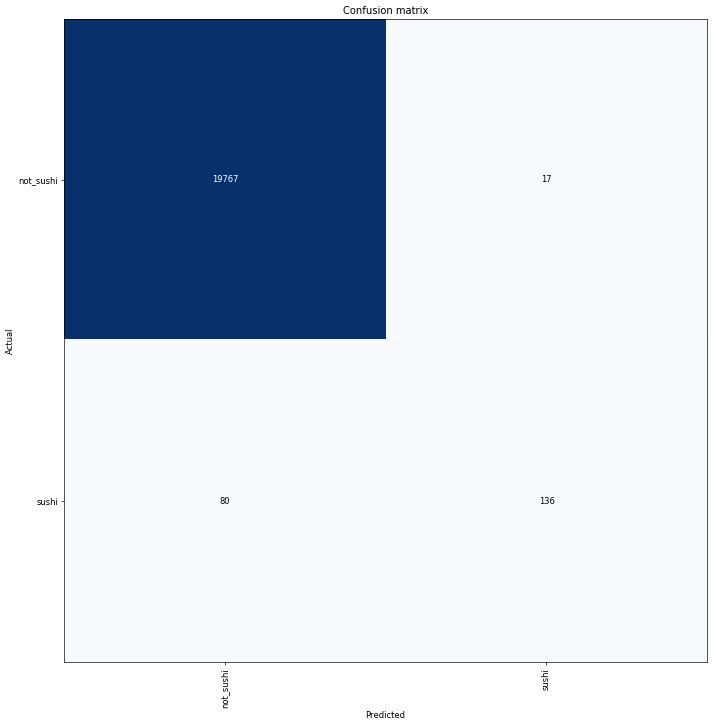

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.confusion_matrix()

array([[19767,    17],
       [   80,   136]], dtype=int64)

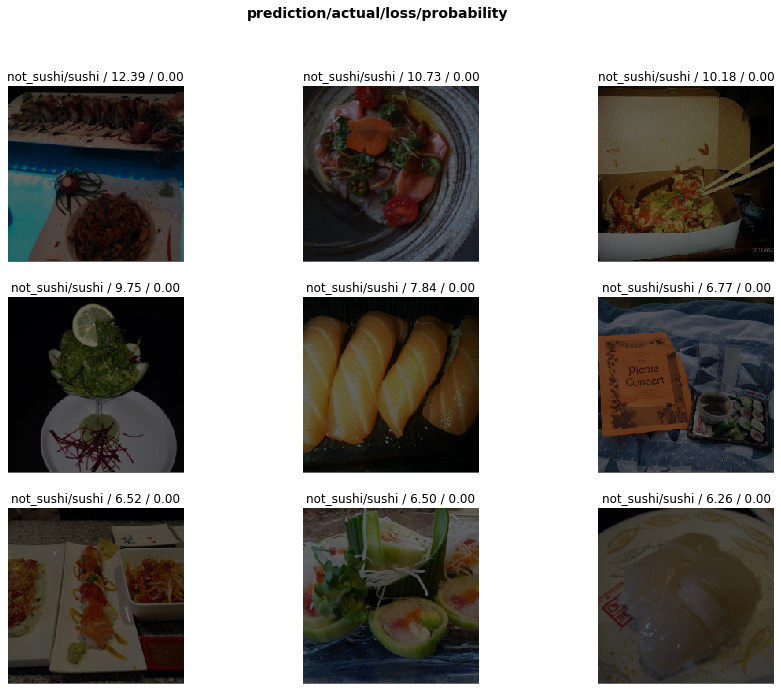

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


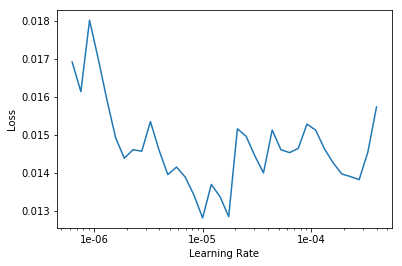

In [38]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,recall,time
0,0.013834,0.017224,0.652778,15:00
1,0.012049,0.016900,0.675926,14:48


In [18]:
learn.save('Final-model')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
interp.confusion_matrix()

array([[19766,    18],
       [   70,   146]], dtype=int64)

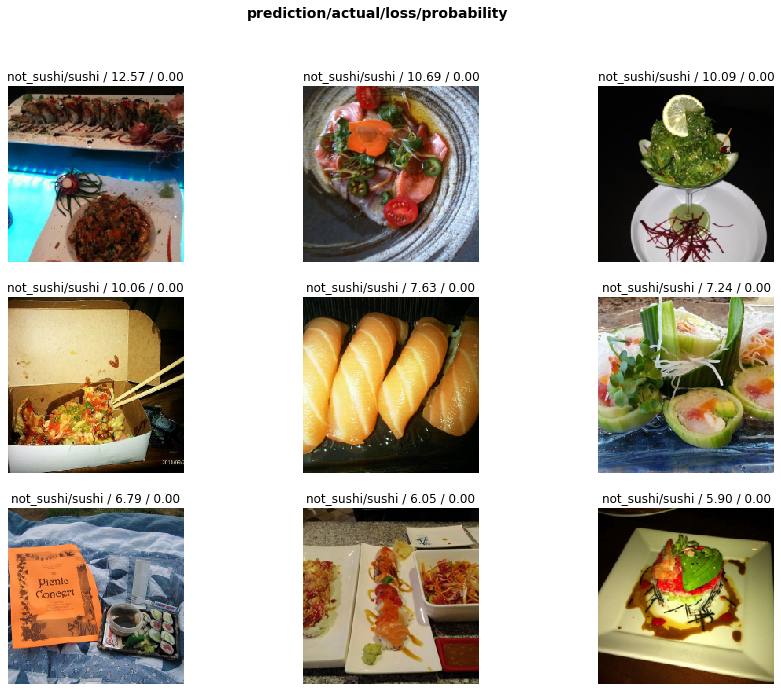

In [21]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)